<a href="https://colab.research.google.com/github/MoeBaa/Final-Task/blob/main/Home_Credit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import os

In [2]:
df= pd.read_csv("/content/application_test.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CNT_CHILDREN        48744 non-null  int64  
 1   AMT_INCOME_TOTAL    48744 non-null  float64
 2   AMT_CREDIT          48744 non-null  float64
 3   NAME_FAMILY_STATUS  48744 non-null  object 
 4   OCCUPATION_TYPE     33139 non-null  object 
 5   CNT_FAM_MEMBERS     48744 non-null  int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 2.2+ MB


In [4]:
df.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_FAMILY_STATUS,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,0,135000.0,568800.0,Married,NaN,2
1,0,99000.0,222768.0,Married,Low-skill Laborers,2
2,0,202500.0,663264.0,Married,Drivers,2
3,2,315000.0,1575000.0,Married,Sales staff,4
4,1,180000.0,625500.0,Married,NaN,3


In [5]:
df.columns

Index(['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'NAME_FAMILY_STATUS',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS'],
      dtype='object')

PREPROCESSING DATA

Mengubah Tipe Data menjadi Integer

In [6]:
df['AMT_INCOME_TOTAL']= df['AMT_INCOME_TOTAL'].astype(np.int64)

In [7]:
df['AMT_CREDIT']= df['AMT_CREDIT'].astype(np.int64)

Pemberian Label

In [8]:
from sklearn.preprocessing import LabelEncoder

Transform
0 = Civil Marriage
1 = Married
2 = Separated
3 = Single/ Not Married
4 = Widow


In [9]:
le = LabelEncoder()
df['NAME_FAMILY_STATUS'] = le.fit_transform(df['NAME_FAMILY_STATUS'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CNT_CHILDREN        48744 non-null  int64 
 1   AMT_INCOME_TOTAL    48744 non-null  int64 
 2   AMT_CREDIT          48744 non-null  int64 
 3   NAME_FAMILY_STATUS  48744 non-null  int64 
 4   OCCUPATION_TYPE     33139 non-null  object
 5   CNT_FAM_MEMBERS     48744 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 2.2+ MB


In [11]:
df.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_FAMILY_STATUS,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,0,135000,568800,1,NaN,2
1,0,99000,222768,1,Low-skill Laborers,2
2,0,202500,663264,1,Drivers,2
3,2,315000,1575000,1,Sales staff,4
4,1,180000,625500,1,NaN,3


Missing Value

In [12]:
df.isna

<bound method DataFrame.isna of        CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  NAME_FAMILY_STATUS  \
0                 0            135000      568800                   1   
1                 0             99000      222768                   1   
2                 0            202500      663264                   1   
3                 2            315000     1575000                   1   
4                 1            180000      625500                   1   
...             ...               ...         ...                 ...   
48739             0            121500      412560                   4   
48740             2            157500      622413                   1   
48741             1            202500      315000                   1   
48742             0            225000      450000                   1   
48743             0            135000      312768                   1   

          OCCUPATION_TYPE  CNT_FAM_MEMBERS  
0                     NaN                2  
1

In [13]:
df.isna().sum()

CNT_CHILDREN              0
AMT_INCOME_TOTAL          0
AMT_CREDIT                0
NAME_FAMILY_STATUS        0
OCCUPATION_TYPE       15605
CNT_FAM_MEMBERS           0
dtype: int64

In [14]:
modus=df['OCCUPATION_TYPE'].mode()[0]
df['OCCUPATION_TYPE']=df['OCCUPATION_TYPE'].fillna(modus)

Duplicated Data

In [15]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
48739    False
48740    False
48741    False
48742     True
48743    False
Length: 48744, dtype: bool

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CNT_CHILDREN        48744 non-null  int64 
 1   AMT_INCOME_TOTAL    48744 non-null  int64 
 2   AMT_CREDIT          48744 non-null  int64 
 3   NAME_FAMILY_STATUS  48744 non-null  int64 
 4   OCCUPATION_TYPE     48744 non-null  object
 5   CNT_FAM_MEMBERS     48744 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 2.2+ MB


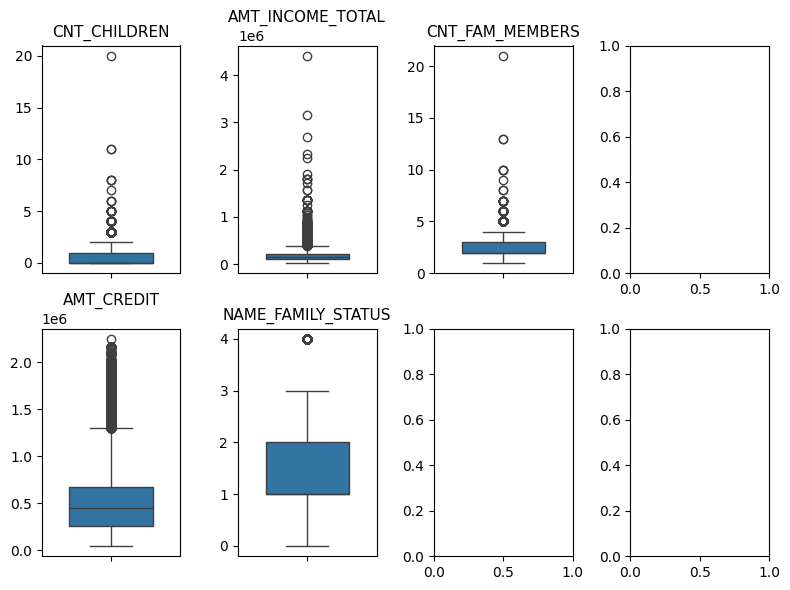

In [17]:
fig, axes = plt.subplots(2, 4, figsize=(8, 6), sharex=False)
p1 = sns.boxplot(df['CNT_CHILDREN'],width=0.6, ax=axes[0,0])
p2 = sns.boxplot(df['AMT_INCOME_TOTAL'], width=0.6, ax=axes[0, 1])
p3 = sns.boxplot(df['AMT_CREDIT'], width=0.6, ax=axes[1, 0])
p4 = sns.boxplot(df['NAME_FAMILY_STATUS'], width=0.6, ax=axes[1, 1])
p5 = sns.boxplot(df['CNT_FAM_MEMBERS'], width=0.6, ax=axes[0, 2])

plot = [p1, p2, p3, p4, p5]

label = ["CNT_CHILDREN", "AMT_INCOME_TOTAL", "AMT_CREDIT", "NAME_FAMILY_STATUS", "CNT_FAM_MEMBERS"]


for i in range(0, 5):
    plot[i].set(ylabel=None, xlabel=None)
    plot[i].axes.set_title(label[i], fontsize=11)


fig.tight_layout()

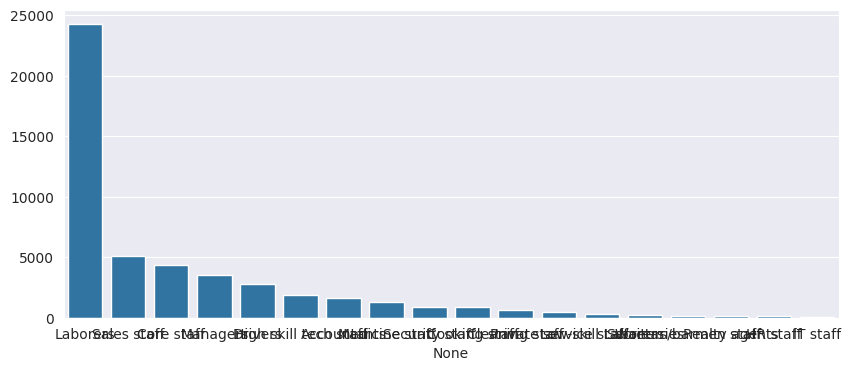

In [18]:
SP= df.OCCUPATION_TYPE.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=SP.index, y=SP.values)
plt.show()

Normalisasi Data

In [19]:
df.min()

CNT_CHILDREN                    0
AMT_INCOME_TOTAL            26941
AMT_CREDIT                  45000
NAME_FAMILY_STATUS              0
OCCUPATION_TYPE       Accountants
CNT_FAM_MEMBERS                 1
dtype: object

In [20]:
df.max()

CNT_CHILDREN                            20
AMT_INCOME_TOTAL                   4410000
AMT_CREDIT                         2245500
NAME_FAMILY_STATUS                       4
OCCUPATION_TYPE       Waiters/barmen staff
CNT_FAM_MEMBERS                         21
dtype: object

In [21]:
df.mean()

<ipython-input-21-c61f0c8f89b5>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()


CNT_CHILDREN               0.397054
AMT_INCOME_TOTAL      178431.804961
AMT_CREDIT            516740.380375
NAME_FAMILY_STATUS         1.397854
CNT_FAM_MEMBERS            2.146767
dtype: float64

In [22]:
X=df.drop(columns=['OCCUPATION_TYPE'])

In [23]:
x_norm = (X-X.min())/(X.max()-X.min())

In [24]:
x_norm.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_FAMILY_STATUS,CNT_FAM_MEMBERS
0,0.00,0.024654,0.238037,0.25,0.05
1,0.00,0.016440,0.080785,0.25,0.05
2,0.00,0.040054,0.280965,0.25,0.05
3,0.10,0.065721,0.695297,0.25,0.15
4,0.05,0.034921,0.263804,0.25,0.10


Menentukan Nilai K dengan Elbow Method


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'inertia')

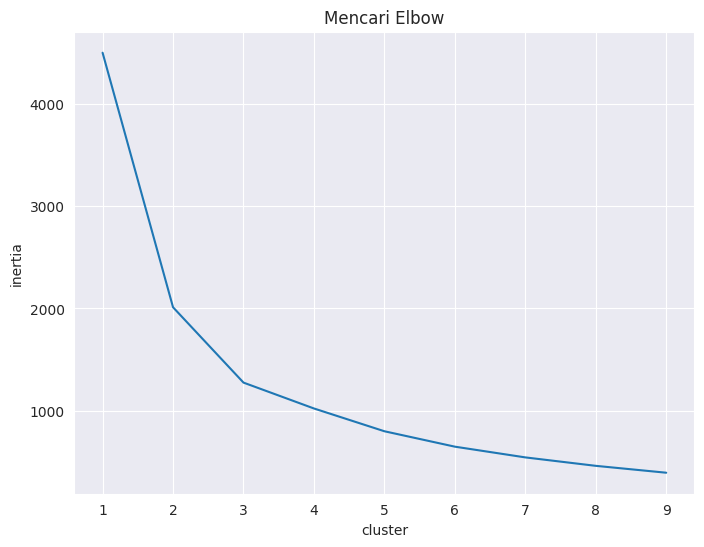

In [25]:
cluster=[]
for i in range (1,10):
  km=KMeans(n_clusters=i).fit(x_norm)
  cluster.append(km.inertia_)

fig, ax = plt.subplots(figsize=(8,6))
sns.lineplot(x=list(range(1,10)), y=cluster, ax=ax)
ax.set_title('Mencari Elbow')
ax.set_xlabel('cluster')
ax.set_ylabel('inertia')

In [26]:
cluster

[4498.36842154984,
 2011.9205229418776,
 1276.1099433086806,
 1023.3861944241964,
 800.90995494609,
 650.3310020029178,
 545.5312519581794,
 463.1176983293483,
 395.84040264615487]

Proses Clustering

In [27]:
n_clust =2
kmean = KMeans(n_clusters=n_clust, random_state=20).fit(x_norm)
preds= kmean.predict(x_norm)
x_norm['Labels'] = kmean.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [28]:
x_norm.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_FAMILY_STATUS,CNT_FAM_MEMBERS,Labels
0,0.00,0.024654,0.238037,0.25,0.05,0
1,0.00,0.016440,0.080785,0.25,0.05,0
2,0.00,0.040054,0.280965,0.25,0.05,0
3,0.10,0.065721,0.695297,0.25,0.15,0
4,0.05,0.034921,0.263804,0.25,0.10,0


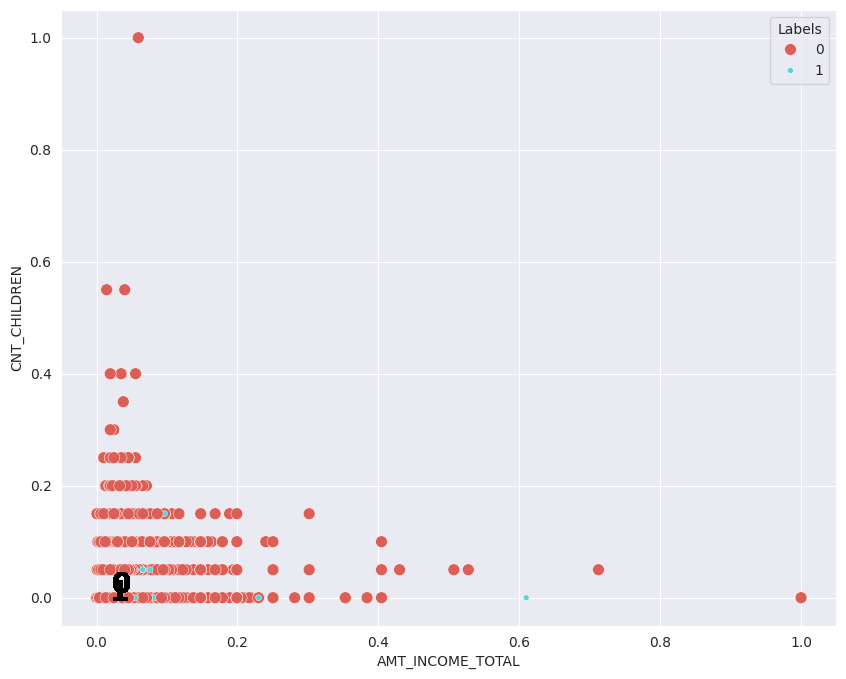

In [29]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=x_norm['AMT_INCOME_TOTAL'], y=x_norm['CNT_CHILDREN'], hue=x_norm['Labels'], markers=True, size=x_norm['Labels'],palette=sns.color_palette('hls', n_clust))


for label in x_norm['Labels']:
  plt.annotate(label,
               (x_norm[x_norm['Labels']==label]['AMT_INCOME_TOTAL'].mean(),
                x_norm[x_norm['Labels']==label]['CNT_CHILDREN'].mean()),
                horizontalalignment = 'center',
                verticalalignment = 'center',
                size = 20, weight = 'bold',
                color= 'black')

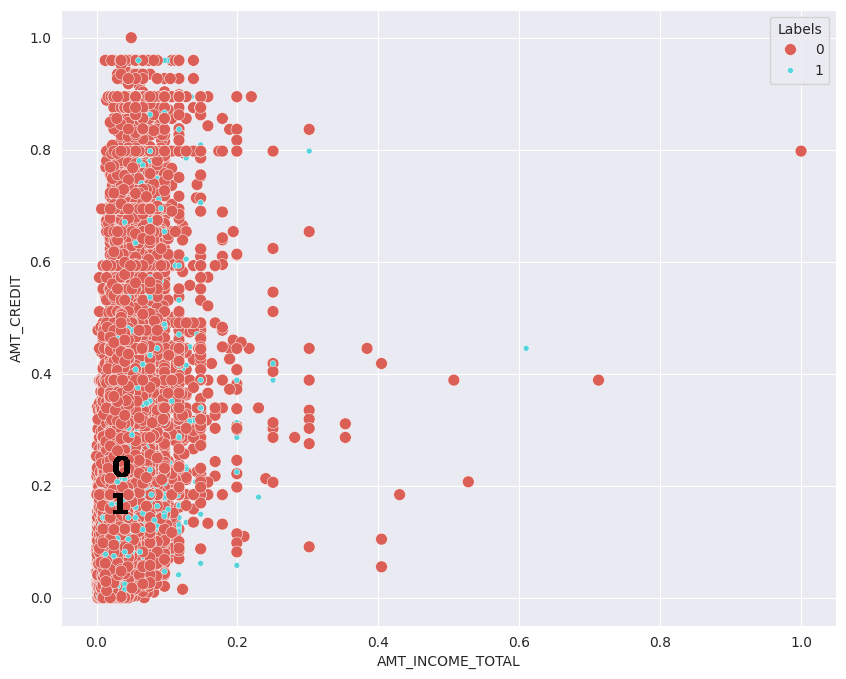

In [30]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=x_norm['AMT_INCOME_TOTAL'], y=x_norm['AMT_CREDIT'], hue=x_norm['Labels'], markers=True, size=x_norm['Labels'],palette=sns.color_palette('hls', n_clust))


for label in x_norm['Labels']:
  plt.annotate(label,
               (x_norm[x_norm['Labels']==label]['AMT_INCOME_TOTAL'].mean(),
                x_norm[x_norm['Labels']==label]['AMT_CREDIT'].mean()),
                horizontalalignment = 'center',
                verticalalignment = 'center',
                size = 20, weight = 'bold',
                color= 'black')

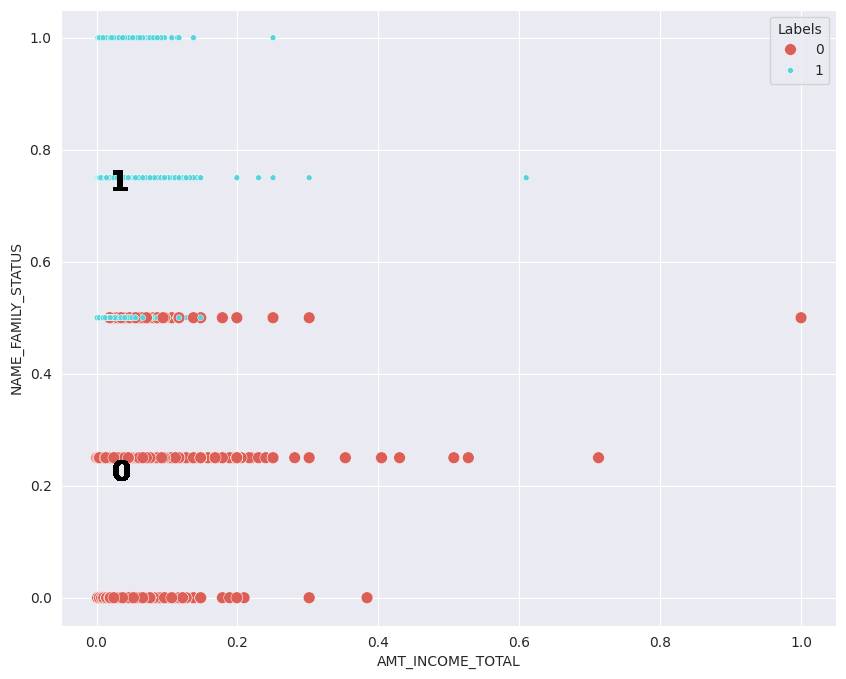

In [31]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=x_norm['AMT_INCOME_TOTAL'], y=x_norm['NAME_FAMILY_STATUS'], hue=x_norm['Labels'], markers=True, size=x_norm['Labels'],palette=sns.color_palette('hls', n_clust))


for label in x_norm['Labels']:
  plt.annotate(label,
               (x_norm[x_norm['Labels']==label]['AMT_INCOME_TOTAL'].mean(),
                x_norm[x_norm['Labels']==label]['NAME_FAMILY_STATUS'].mean()),
                horizontalalignment = 'center',
                verticalalignment = 'center',
                size = 20, weight = 'bold',
                color= 'black')

In [34]:
df.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_FAMILY_STATUS,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,0,135000,568800,1,Laborers,2
1,0,99000,222768,1,Low-skill Laborers,2
2,0,202500,663264,1,Drivers,2
3,2,315000,1575000,1,Sales staff,4
4,1,180000,625500,1,Laborers,3


In [ ]:
df.to_excel('output.xlsx', index=False)